In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
entropy = 42

In [3]:
base_relative_abundances = [1e-4, 1e-3, 1e-2]

relative_abundances = [relative_abundance * number
                       for relative_abundance 
                       in base_relative_abundances
                       for number in (1,2,5) 
                       for repeat in range(10)]

relative_abundances += [1-sum(relative_abundances)]
frequencies = np.array(relative_abundances)

In [4]:
seed = np.random.SeedSequence(entropy)
rng = np.random.default_rng(seed)
interaction_matrix = 2*(rng.random(size=(frequencies.size, frequencies.size)) - 0.5)
# https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.integers.html
interaction_matrix *= rng.integers(low=0, high=2, size=(frequencies.size, frequencies.size))

<AxesSubplot:>

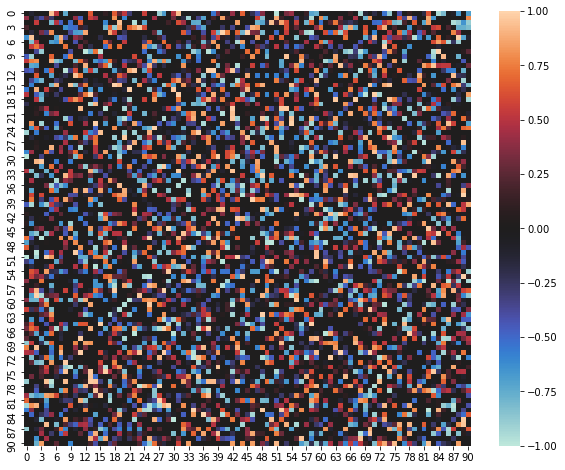

In [5]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(interaction_matrix, vmin=-1., vmax=1., cmap='icefire')

In [6]:
pairwise_results = np.load('pairwise_results.npz')

In [7]:
pairwise_results.files

['divergences', 'pvals', 'sign_vectors']

In [8]:
pvals = pairwise_results['pvals']

In [9]:
np.triu_indices_from(pvals, k=1)

(array([ 0,  0,  0, ..., 88, 88, 89]), array([ 1,  2,  3, ..., 89, 90, 90]))

In [10]:
pvals[0:5,0:5]

array([[0.00000000e+00, 3.20771150e-01, 2.23063224e-01, 3.91167341e-20,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.83009908e-02, 2.52761898e-17,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.19175124e-22,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [11]:
np.triu_indices_from(pvals[0:5,0:5], k=1)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([1, 2, 3, 4, 2, 3, 4, 3, 4, 4]))

In [12]:
np.shape(pvals[np.triu_indices_from(pvals, k=1)])

(4095,)

In [13]:
sorted_pvals = np.sort(pvals[np.triu_indices_from(pvals, k=1)])

In [14]:
sorted_pvals[0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
from statsmodels.stats.multitest import multipletests

In [16]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html
test = multipletests(sorted_pvals, alpha=0.01, method='holm', is_sorted=True)

In [17]:
test

(array([ True,  True,  True, ..., False, False, False]),
 array([ 0.,  0.,  0., ..., nan, nan, nan]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [18]:
# not correct, I just want to see if returns same 'alpha bonf value etc. regardless of method used'
multipletests(sorted_pvals, alpha=0.01, method='sidak', is_sorted=True)

(array([ True,  True,  True, ..., False, False, False]),
 array([ 0.,  0.,  0., ..., nan, nan, nan]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [19]:
# not correct, I just want to see if returns same 'alpha bonf value etc. regardless of method used'
multipletests(sorted_pvals, alpha=0.01, method='simes-hochberg', is_sorted=True)

(array([ True,  True,  True, ..., False, False, False]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [20]:
# not correct, I just want to see if returns same 'alpha bonf value etc. regardless of method used'
multipletests(sorted_pvals, alpha=0.01, method='hommel', is_sorted=True)

(array([False, False, False, ..., False, False, False]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [21]:
# not correct, I just want to see if returns same 'alpha bonf value etc. regardless of method used'
multipletests(sorted_pvals, alpha=0.01, method='fdr_by', is_sorted=True)

(array([ True,  True,  True, ..., False, False, False]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [22]:
# not correct, I just want to see if returns same 'alpha bonf value etc. regardless of method used'
multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.01, method='sidak', is_sorted=False)

(array([False, False,  True, ...,  True,  True,  True]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 2.45429145795395e-06,
 2.4420024420024423e-06)

In [23]:
test2 = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.01, method='holm', is_sorted=False)

In [24]:
from numpy.testing import assert_array_equal

In [25]:
sort_indices = np.argsort(pvals[np.triu_indices_from(pvals, k=1)])
assert_array_equal(test[0], test2[0][sort_indices])

good sanity check, yay

In [26]:
0.01/4095

2.4420024420024423e-06

OK so the corrected `alpha` for the Bonferroni method returned by the function is pretty much useless or at least not very informative huh -- OK good to know.

## comprehensive/better approach I guess

In [27]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.01, method='holm', is_sorted=False)[0:2]

In [28]:
unsorted_but_corrected_rejections

array([False, False,  True, ...,  True,  True,  True])

In [29]:
np.sum(unsorted_but_corrected_rejections)

3331

OK well that's not great because we know that only approximately half of the interactions are non-zero

Again not that surprising though that it's picking up spurious interactions because it's based on CPDM, and even for CPDM (i.e. non-interaction version) that that will reject things spuriously based on CPM. but whatever I guess...

In [30]:
upper_triangular_indices[0][unsorted_but_corrected_rejections]

array([ 0,  0,  0, ..., 88, 88, 89])

In [31]:
upper_triangular_indices[1][unsorted_but_corrected_rejections]

array([ 3,  4,  5, ..., 89, 90, 90])

In [32]:
test = pvals[upper_triangular_indices[0][unsorted_but_corrected_rejections], upper_triangular_indices[1][unsorted_but_corrected_rejections]]

In [33]:
test2 = unsorted_but_corrected_pvals[unsorted_but_corrected_rejections]

In [34]:
test2

array([4.09161039e-17, 0.00000000e+00, 5.77059883e-83, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

crud... why are these not the same??? hm. huh?

oh duh because they are corrected, not just unsorted. so unless you applied correction to the others, you know
well at least sparsity pattern is the same, which would be expected, yes? um maybe

In [35]:
np.sum((test != 0) == (test2 != 0))

3331

ugh of course

what about

In [36]:
np.sum(test2 >= test)

3331

ok well that's a good sign at least???

In [37]:
entries_to_keep = np.zeros(pvals.shape, dtype=bool)
entries_to_keep[upper_triangular_indices[0][unsorted_but_corrected_rejections],
               upper_triangular_indices[1][unsorted_but_corrected_rejections]] = True

In [38]:
dumb_test = np.where(entries_to_keep, pvals, 1.)

In [39]:
np.where(dumb_test < 1)

(array([ 0,  0,  0, ..., 88, 88, 89]), array([ 3,  4,  5, ..., 89, 90, 90]))

ok at least it looks like the code is doing the intended thing but I'm still not very clear yet about what exactly to do...

um well that would involve extracting the indices from sign vectors where you had rejections and stuff..., like first and foremost you know...

In [40]:
pairwise_results.files

['divergences', 'pvals', 'sign_vectors']

In [41]:
sign_vectors = pairwise_results['sign_vectors']

In [42]:
sign_vectors.shape

(91, 91, 3)

In [43]:
sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...].shape

(3331, 3)

In [44]:
sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

array([[-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       ...,
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.]])

then I think the one interaction sign is the opposite of the first column,
and the other interaction is the opposite of the third column???

something like this... that sort of feels right...

if A helps B (in terms of mutual benefits or parasitism), i.e. effect of A on B is positive, relative proportion of A only is decreased

first column is (sign change of) relative proportion of A only, so -1 in first column means that A helps B

if A hurts B (in terms of mutual antagonism or parasitism), i.e. effect of A on B is negative, relative proportion of A only is increased (at least again based on the simulations/concept)

first column is (sign change of) relative proportion of A only, so 1 in first column means that A hurts B

similarly,

third column is (sign change of) relative proportion of B only, so -1 in third column means that B helps A

third column is (sign change of) relative proportion of B only, so 1 in third column means that B hurts A

again all of this is ostensibly

#### conclusion

so to get signs of interactions of A acting on B (s1 acting on s2), take negative of first column

to get signs of interactions of B acting on A (s2 acting on s1), take negative of _third_ column

In [45]:
significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

In [46]:
effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

In [47]:
effects_of_A_on_B

array([ 1.,  1.,  1., ...,  1., -1., -1.])

In [48]:
effects_of_B_on_A

array([-1., -1., -1., ..., -1.,  1.,  1.])

In [49]:
inferred_interactions = np.zeros((frequencies.size, frequencies.size))

In [50]:
inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B

In [51]:
effects_of_A_on_B

array([ 1.,  1.,  1., ...,  1., -1., -1.])

In [52]:
# transpose to get effects of s2 on s1, below diagonal, interactions
inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

In [53]:
inferred_interactions

array([[ 0.,  0.,  0., ...,  0.,  1., -1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1., -1.],
       [-1., -1., -1., ..., -1.,  0., -1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  0.]])

OK seems sort of legit so far???

<AxesSubplot:>

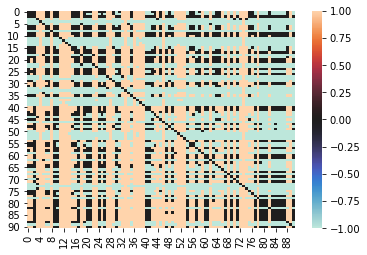

In [54]:
sns.heatmap(inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

ooh that's rough -- doesn't look like the right/correct values at all now does it huh

ugh yeah too much systematic interference from the CPDM part...

well admittedly I guess it might still be a good result to know that this doesn't work...
but dang this will really be boring...

In [55]:
thresholded_interactions = np.where(interaction_matrix > 0, 1., interaction_matrix)
thresholded_interactions = np.where(thresholded_interactions < 0, -1., thresholded_interactions)

In [56]:
thresholded_interactions

array([[ 0., -1.,  0., ..., -1.,  0., -1.],
       [ 1., -0., -1., ...,  0.,  0.,  1.],
       [ 0., -0.,  1., ..., -1., -1., -1.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1., -1.],
       [ 0., -0., -1., ..., -0.,  0.,  0.],
       [ 0.,  0., -1., ...,  1., -0., -0.]])

In [57]:
interaction_matrix

array([[ 0.        , -0.12224312,  0.        , ..., -0.67745644,
         0.        , -0.69537579],
       [ 0.39264075, -0.        , -0.23795755, ...,  0.        ,
         0.        ,  0.78689328],
       [ 0.        , -0.        ,  0.54402486, ..., -0.88920918,
        -0.65071706, -0.89323613],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.84509484,
         0.05799386, -0.09576042],
       [ 0.        , -0.        , -0.64063597, ..., -0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.77205883, ...,  0.85139453,
        -0.        , -0.        ]])

<AxesSubplot:>

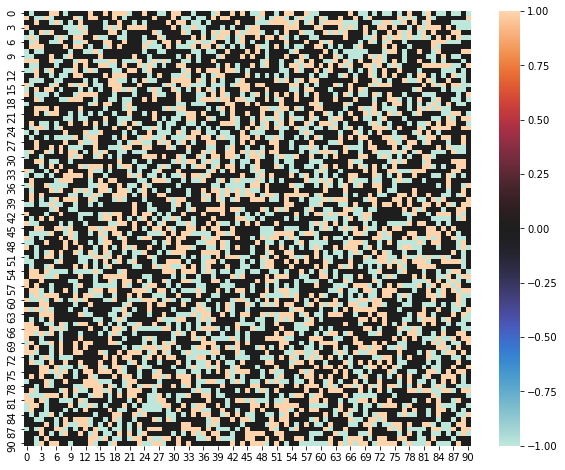

In [58]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(thresholded_interactions, vmin=-1., vmax=1., cmap='icefire')

### desperate attempt

what happens if we make the p value threshold smaller????

In [59]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.001, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

<AxesSubplot:>

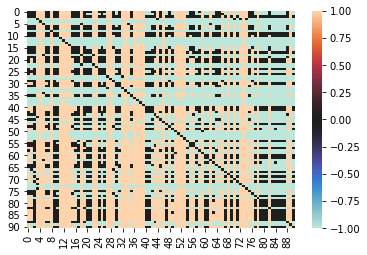

In [60]:
sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

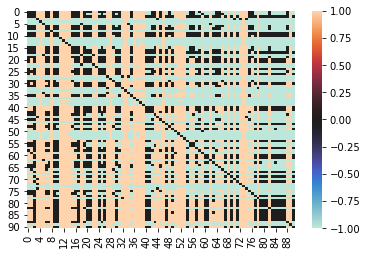

In [61]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.0001, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

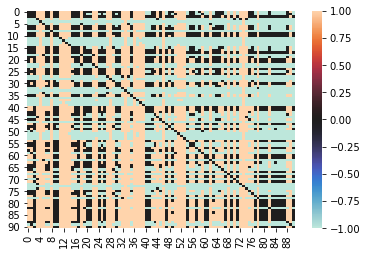

In [62]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.00001, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

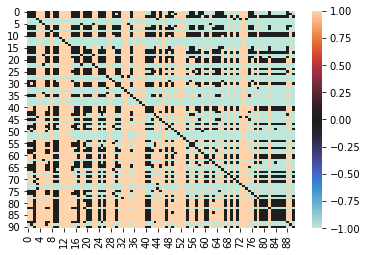

In [63]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.000001, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

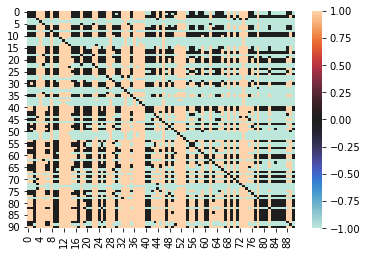

In [64]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0.0000001, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

wow ok the sparsity value isn't really changing for smaller values of alpha so far -- these p values must be really small

which I think in and of itself is not a great sign -- you're getting spurious signal which is nevertheless very strong, mostly from the CPDM not matching the CPM distribution, it would seem. Crud

<AxesSubplot:>

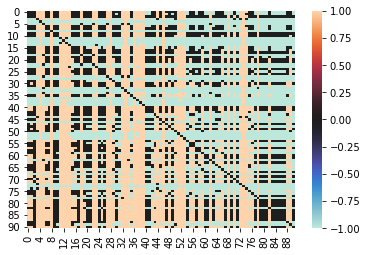

In [65]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-10, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

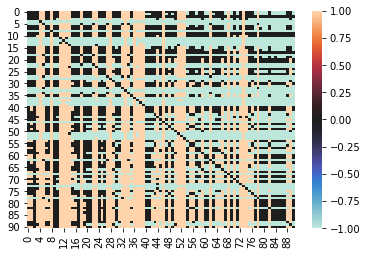

In [66]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-20, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

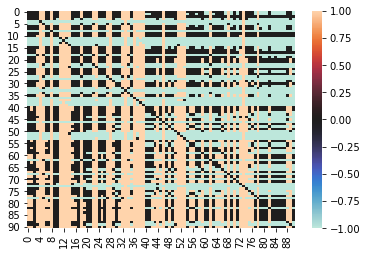

In [67]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-30, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

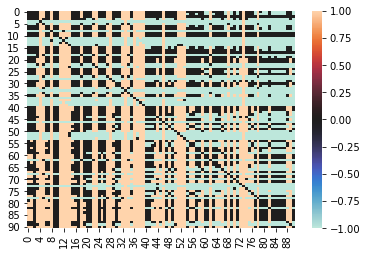

In [68]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-40, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

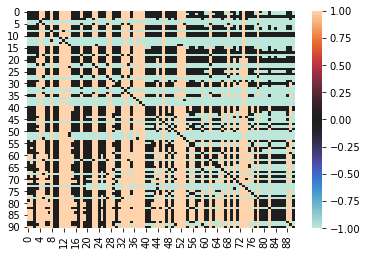

In [69]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-50, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

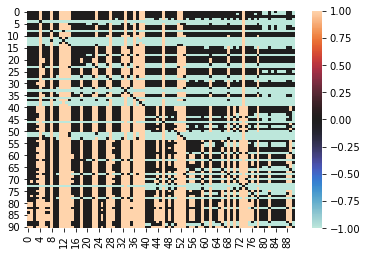

In [70]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-200, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

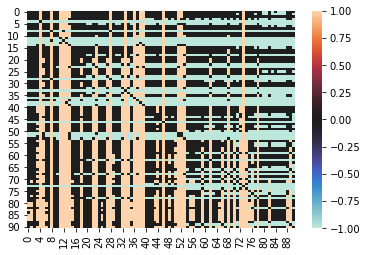

In [71]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=1.e-20000, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

<AxesSubplot:>

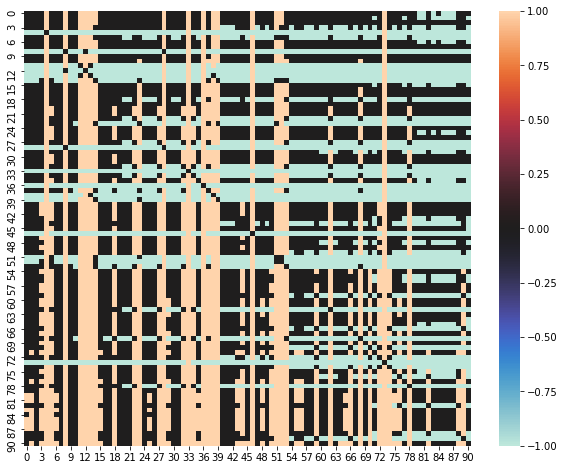

In [72]:
upper_triangular_indices = np.triu_indices_from(pvals, k=1)
flattened_pvals = pvals[upper_triangular_indices]
(unsorted_but_corrected_rejections,
unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=0, method='holm', is_sorted=False)[0:2]

significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
            upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

effects_of_A_on_B = -significant_sign_vectors[:,0]
effects_of_B_on_A = -significant_sign_vectors[:,2]

more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
                     upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# transpose to get effects of s2 on s1, below diagonal, interactions
more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
                     upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

fig = plt.figure(figsize=(10,8))
sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

In [73]:
# upper_triangular_indices = np.triu_indices_from(pvals, k=1)
# flattened_pvals = pvals[upper_triangular_indices]
# (unsorted_but_corrected_rejections,
# unsorted_but_corrected_pvals) = multipletests(pvals[np.triu_indices_from(pvals, k=1)], alpha=-0.01, method='holm', is_sorted=False)[0:2]

# significant_sign_vectors = sign_vectors[upper_triangular_indices[0][unsorted_but_corrected_rejections],
#             upper_triangular_indices[1][unsorted_but_corrected_rejections], ...]

# effects_of_A_on_B = -significant_sign_vectors[:,0]
# effects_of_B_on_A = -significant_sign_vectors[:,2]

# more_stringently_inferred_interactions = np.zeros((frequencies.size, frequencies.size))

# more_stringently_inferred_interactions[upper_triangular_indices[0][unsorted_but_corrected_rejections],
#                      upper_triangular_indices[1][unsorted_but_corrected_rejections]] = effects_of_A_on_B
# # transpose to get effects of s2 on s1, below diagonal, interactions
# more_stringently_inferred_interactions[upper_triangular_indices[1][unsorted_but_corrected_rejections],
#                      upper_triangular_indices[0][unsorted_but_corrected_rejections]] = effects_of_B_on_A

# sns.heatmap(more_stringently_inferred_interactions, vmin=-1.0, vmax=1., cmap='icefire')

OK the code seems to work, it just seems like most of the values were so close to $0$ that they literally couldn't be distinguished from $0$ and were counted as $0$, so basically due to limits of numerical precision, no amount of trying to salvage this by trying to make significance level smaller will work

ugh this chapter is horrible...

## get jaccard similarity score

In [74]:
from simulations.utils import (relative_error, spearman, mixed_sign_Jaccard_similarity,
                              mixed_fnr, mixed_fdr, compute_exact_null_distributions,
                              deltacon)

from analysis_utils.analyze_coefficient_estimates import (
true_numbers_from_truth, get_jaccards
)

WARNING: following cell turns out to be ridiculously slow. sorry

update: actually impractiably slow and memory greedy if try to compute exact null distribution for $n=91$, scaling appears to be about $O(n^6)$, possibly $O(n^6 \log (n))$ when factor in all of the sorting. probably shouldn't bother for now, and in future will have to focus on 10 by 10 subsquares, or just use Monte Carlo simulation for 91 strain communities in stead

In [75]:
# true_numbers = true_numbers_from_truth(interaction_matrix)
# exact_null_distributions = compute_exact_null_distributions(true_numbers)

# pos_truth = np.where(interaction_matrix > 0, interaction_matrix, 0)
# neg_truth = np.where(interaction_matrix < 0, -interaction_matrix, 0)

huh hadn't thought about this in advance, but _maybe_, _maybe_ the exact null distribution computation is substantially more difficult as the number of strains increases?

really would have to think about that more, i.e. about the algorithm and review it. but anyway seems plausible to me from what I vaguely remember that the scaling might be super-lienar. which is not great because I never used this before on anything that had more than 11 strains so, not great

In [76]:
mixed_sign_Jaccard_similarity(interaction_matrix, more_stringently_inferred_interactions, unweighted=True)

0.16102482410726138

In [77]:
relative_error(more_stringently_inferred_interactions, interaction_matrix)

1.58899777414132

In [78]:
relative_error(interaction_matrix, more_stringently_inferred_interactions)

1.58899777414132

why is relative error here symmetric? (I thought it's not supposed to be...)

In [79]:
mixed_fdr(interaction_matrix, more_stringently_inferred_interactions)

0.7368763557483731

In [80]:
mixed_fnr(interaction_matrix, more_stringently_inferred_interactions)

0.7067214700193424

In [81]:
from scipy.stats import rankdata
from simulations.utils.random import pearson
from simulations.utils.generalized_jaccard import get_positive_part, get_negative_part

def mixed_sign_spearman(matrix1, matrix2):
    pos_matrix1 = get_positive_part(matrix1)
    pos_matrix2 = get_positive_part(matrix2)
    
    neg_matrix1 = get_negative_part(matrix1)
    neg_matrix2 = get_negative_part(matrix2)
    
    rank_vectors1 = [rankdata(pos_matrix1.ravel()), rankdata(neg_matrix1.ravel())]
    rank_vectors2 = [rankdata(pos_matrix2.ravel()), rankdata(neg_matrix2.ravel())]
    
    return pearson(np.concatenate(rank_vectors1), np.concatenate(rank_vectors2))

In [82]:
mixed_sign_spearman(interaction_matrix, more_stringently_inferred_interactions)

0.020395759247847714

In [83]:
from simulations.utils.random import mixed_sign_spearman as test

test(interaction_matrix, more_stringently_inferred_interactions)

0.020395759247847714